# Stroke Prediction

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from mlxtend.classifier import EnsembleVoteClassifier
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Reading Dataset

In [ ]:
missing_val=["N/A","NA","Na","N/a",np.nan,"XXX","Unknown"]
df=pd.read_csv("stroke.csv",sep=",",na_values=missing_val)
pd.pandas.set_option('display.max_rows',None)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1


## Preprocessing 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

<AxesSubplot:>

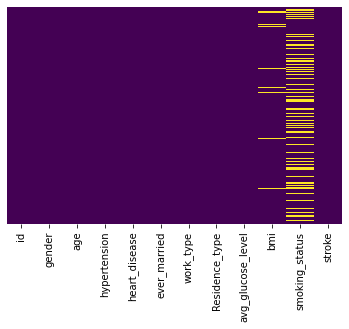

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print ("Unique values are:\n",df.nunique())

Unique values are:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          3
stroke                  2
dtype: int64


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
miss_val = df.isnull().sum()/len(df)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(df.shape))

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.933464
smoking_status       30.215264
stroke                0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
# Missing values in variable smoking_status	: 30.22%
Data shape: (5110, 12)


In [ ]:
#counting outliers for bmi

bmi_outliers=df[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [ ]:
#replacing outlier entries with mean of bmi
df["bmi"] = df["bmi"].apply(lambda x: df.bmi.mean() if x>50 else x)

In [ ]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
miss_val = df.isnull().sum()/len(df)*100
df = df[df['smoking_status'].notnull()]
# drop variable 'id'
df.drop(columns='id',axis=1,inplace=True)
# validate there's no more missing values
miss_val = df.isnull().sum()/len(df)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(df.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (3566, 11)


In [ ]:
df.shape

(3566, 11)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000
mean,48.853898,0.125070,0.063937,108.982011,29.773909,0.056646
std,18.874375,0.330845,0.244675,48.292204,6.271389,0.231198
min,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,34.000000,0.000000,0.000000,77.460000,25.400000,0.000000
50%,50.000000,0.000000,0.000000,92.650000,28.750000,0.000000
75%,63.000000,0.000000,0.000000,116.677500,33.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


In [ ]:
df["gender"].value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

In [ ]:
# number of 'other' is very small, converting the value to 'Male'
df['gender']=df['gender'].replace('Other','Male')

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))
print(categorical_features)
df[categorical_features].head()

Number of categorical variables:  5
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)
# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  6
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.451796,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


In [ ]:
for i in categorical_features:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("-"*100)

gender ['Male' 'Female']
Female    2158
Male      1408
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
ever_married ['Yes' 'No']
Yes    2710
No      856
Name: ever_married, dtype: int64
----------------------------------------------------------------------------------------------------
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          2285
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64
----------------------------------------------------------------------------------------------------
Residence_type ['Urban' 'Rural']
Urban    1814
Rural    1752
Name: Residence_type, dtype: int64
----------------------------------------------------------------------------------------------------
smoking_status ['formerly smoked' 'never smoked' 'smokes']
never smoked       1892
formerly smoked     885
smokes       

### Data Analysis

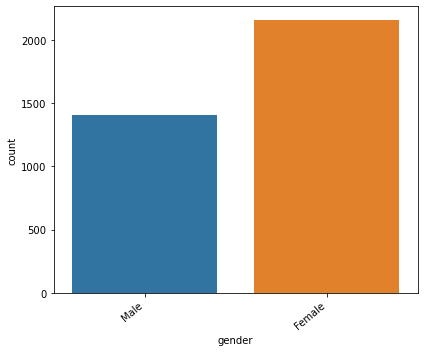

----------------------------------------------------------------------------------------------------


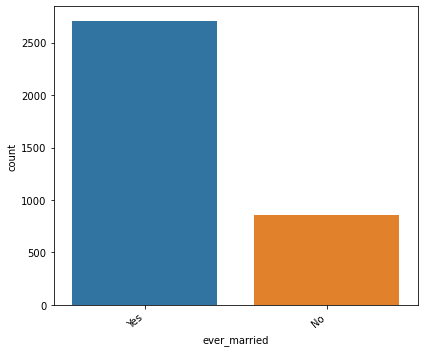

----------------------------------------------------------------------------------------------------


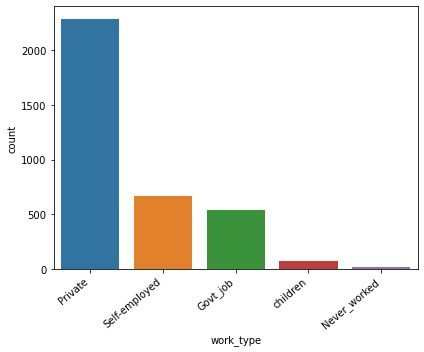

----------------------------------------------------------------------------------------------------


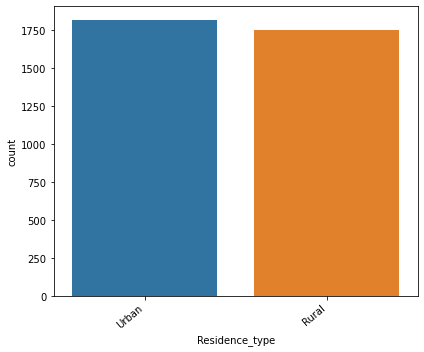

----------------------------------------------------------------------------------------------------


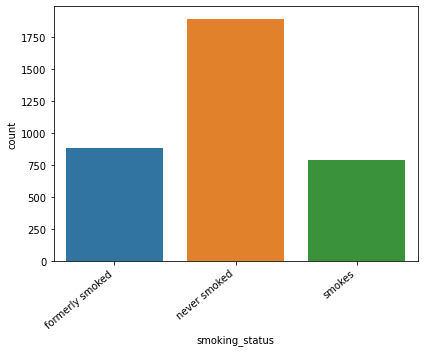

----------------------------------------------------------------------------------------------------


In [ ]:
for i in categorical_features:
    plt.figure(figsize=(6,5))
    ax = sns.countplot(x=i, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("-"*100)

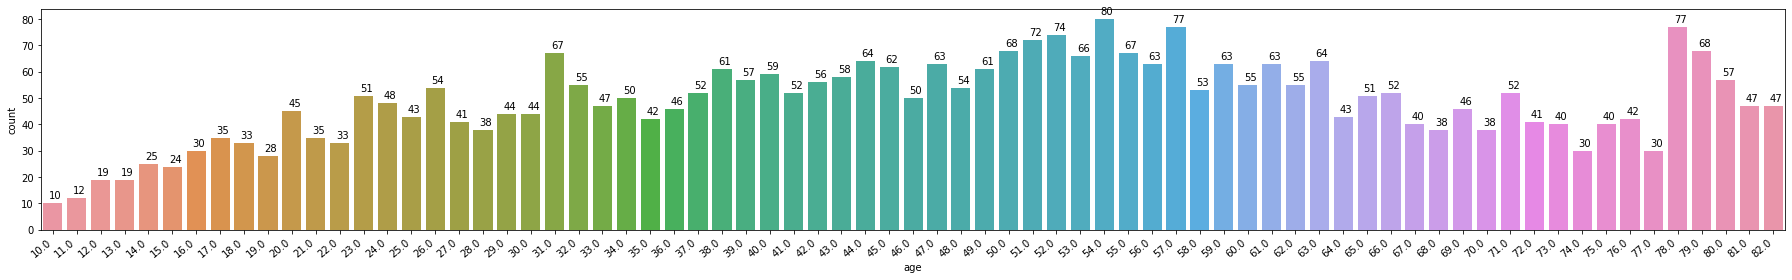

In [ ]:
plt.figure(figsize=(25,4))
ax = sns.countplot(x="age", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.tight_layout()
plt.show()

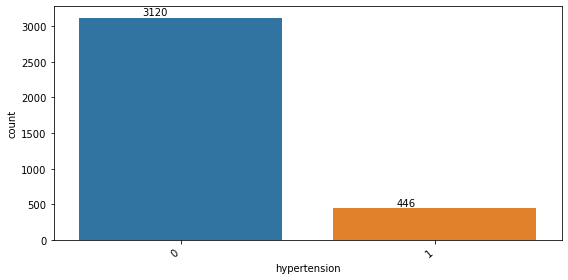

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="hypertension", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.tight_layout()
plt.show()

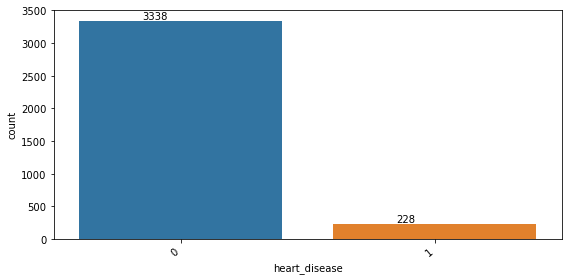

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="heart_disease", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.tight_layout()
plt.show()

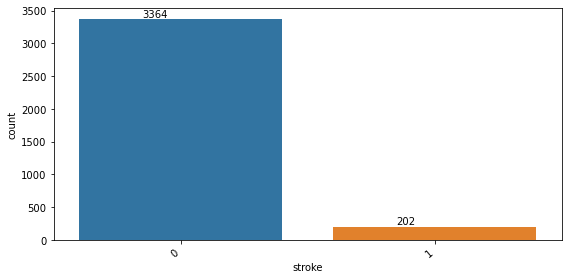

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="stroke", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.tight_layout()
plt.show()

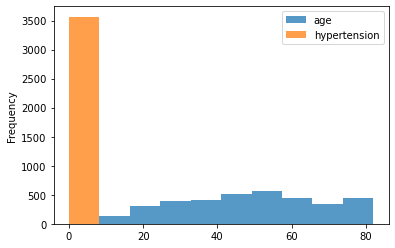

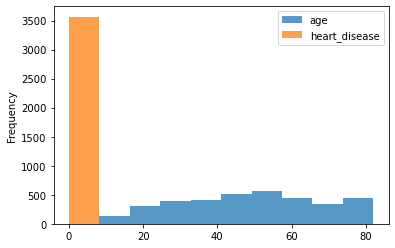

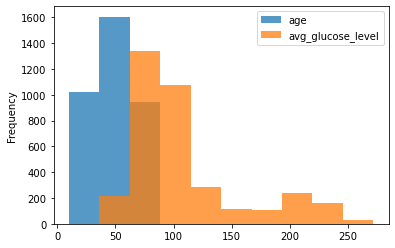

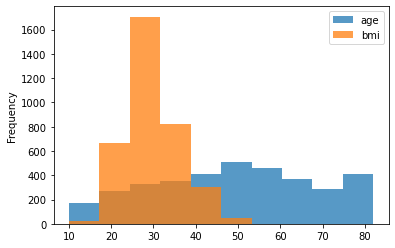

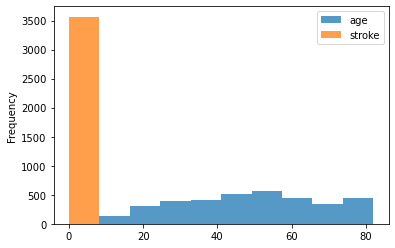

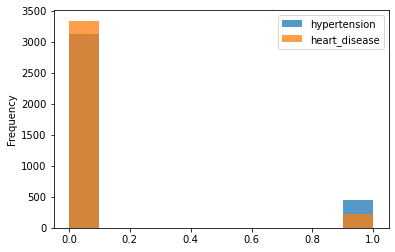

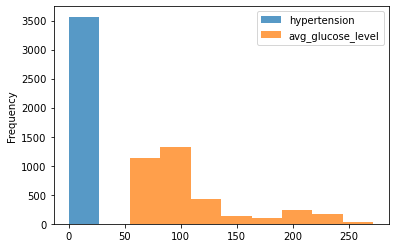

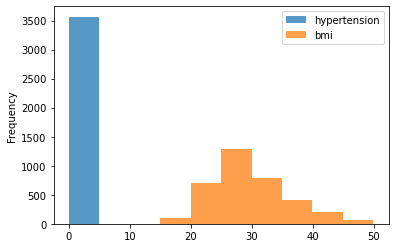

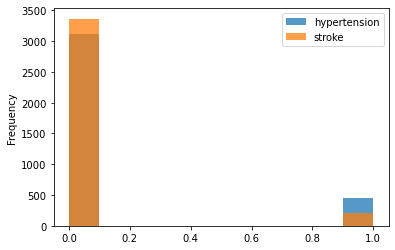

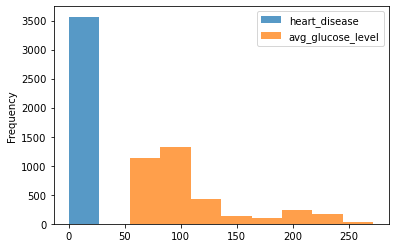

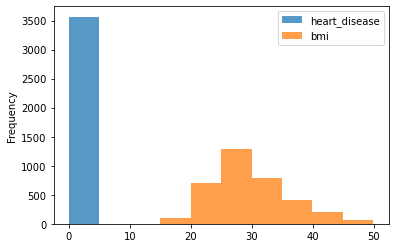

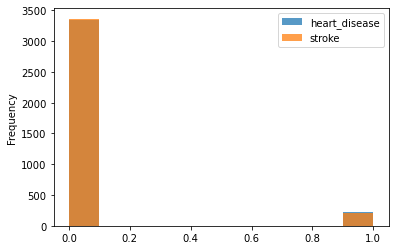

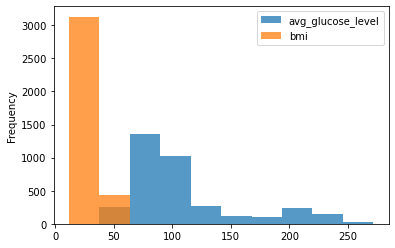

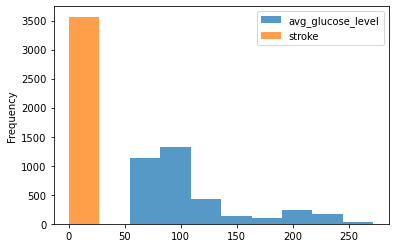

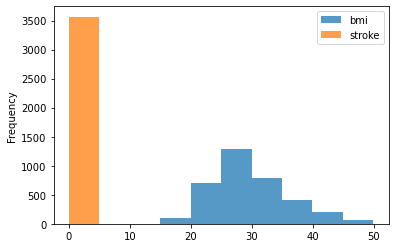

In [ ]:
for i in range(len(numerical_features)):
    for j in range(i+1,len(numerical_features)):
        s1 = df[[numerical_features[i],numerical_features[j]]]
        s1.plot.hist(alpha=0.75)

In [ ]:
 # Label Encode and Hot Encode for Categorical Columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(len(categorical_features)):
    df[categorical_features[i]]=encoder.fit_transform(df[categorical_features[i]])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.451796,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1


In [ ]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

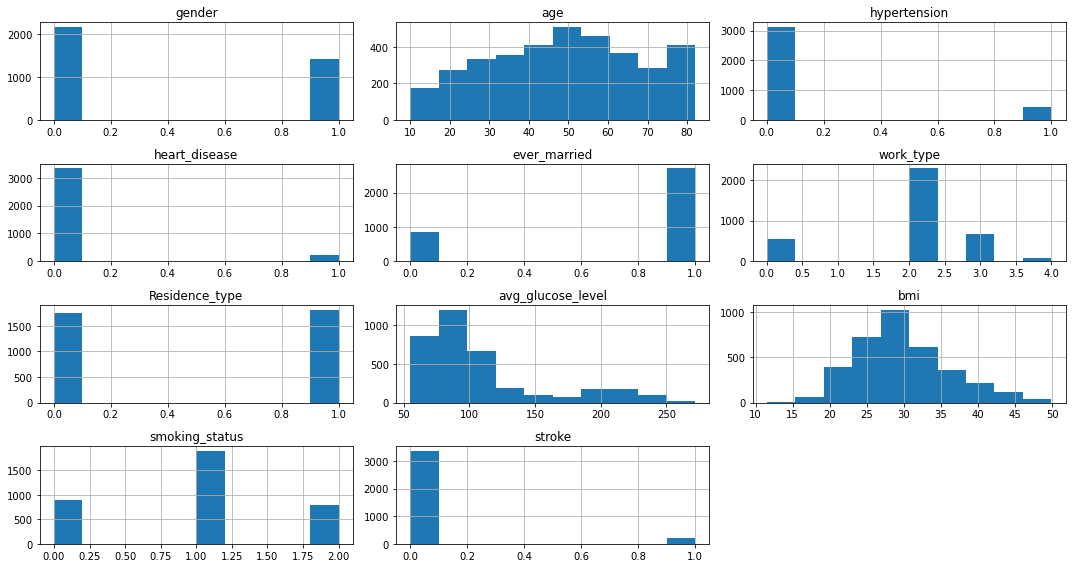

In [ ]:
fig = df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

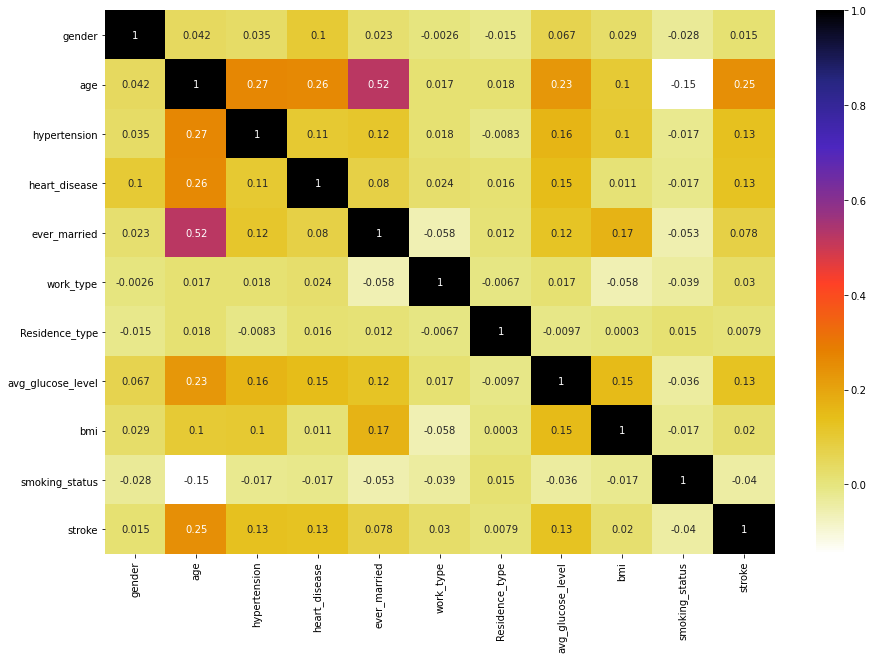

In [ ]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.80)
len(set(corr_features))

0

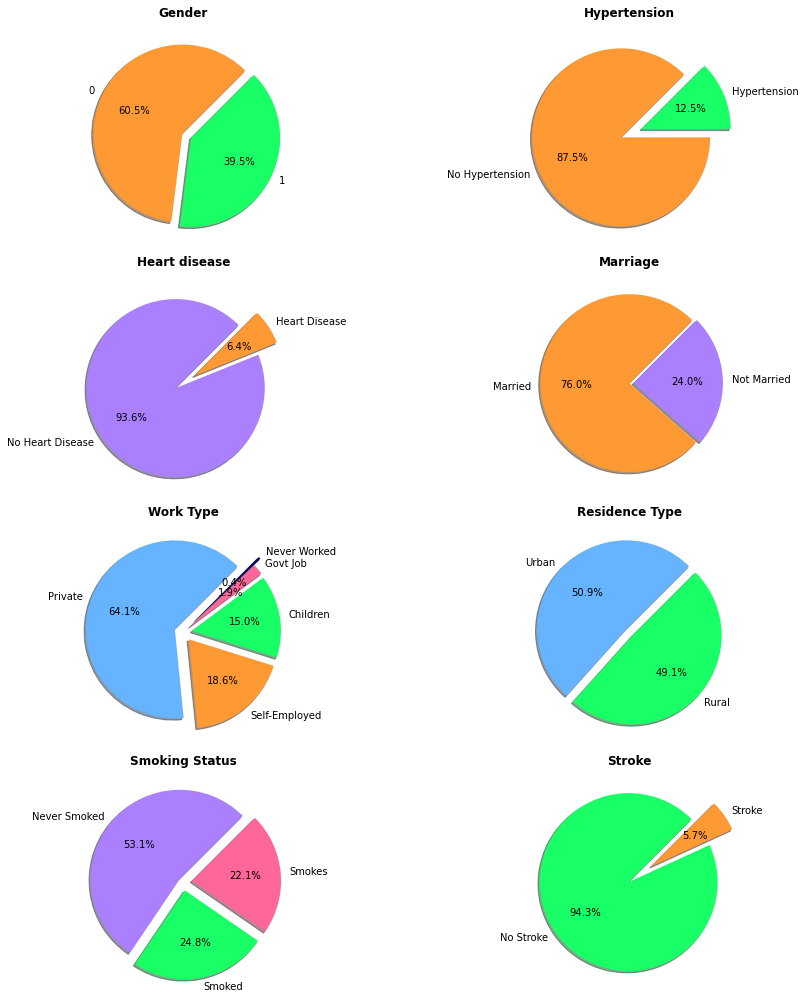

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Smoked", "Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.1, 0.1],colors=['#AA80FF','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

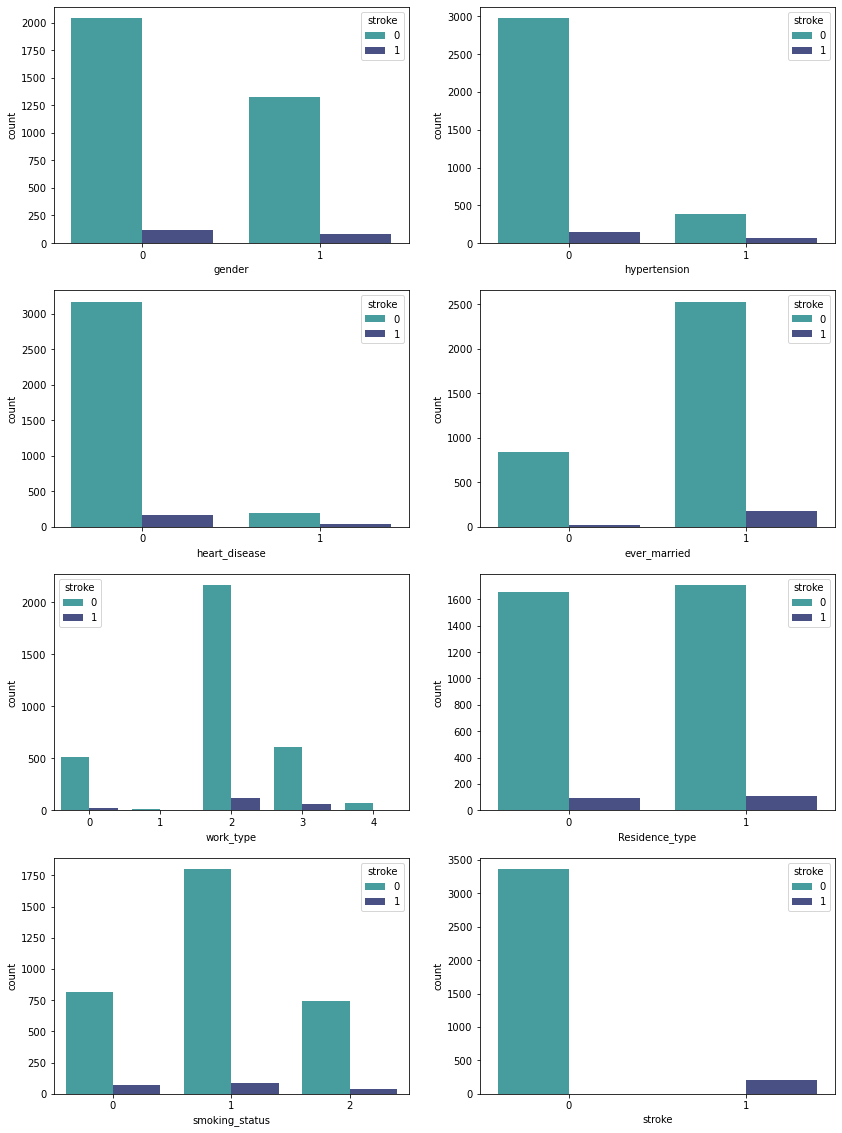

In [ ]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'],palette='mako_r')

### Spliting Of Data

In [ ]:
X=df.drop("stroke",axis=1)
Y=df["stroke"]

In [ ]:
X.shape,Y.shape

((3566, 10), (3566,))

In [ ]:
X_wot_smote, X_wov_smote, y_wot_smote, y_wov_smote = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
print("The size of training input is", X_wot_smote.shape)
print("The size of training output is", y_wot_smote.shape)
print("The size of testing input is", X_wov_smote.shape)
print("The size of testing output is", y_wov_smote.shape)

The size of training input is (2674, 10)
The size of training output is (2674,)
The size of testing input is (892, 10)
The size of testing output is (892,)


In [ ]:
df["stroke"].value_counts()

0    3364
1     202
Name: stroke, dtype: int64

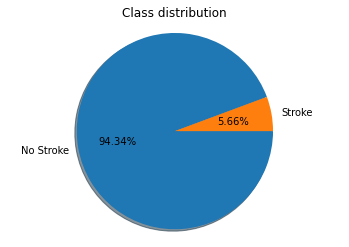

# samples associated with no stroke: 3364
# samples associated with stroke: 202


In [ ]:
class_occur = df['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(df.loc[:,df.columns!='stroke'], df['stroke'])
print("Shape of X before SMOTE: {}".format(X.shape))
print("Shape of X after SMOTE: {}".format(X_smote.shape))
y_smote.value_counts(normalize=True)*100

Shape of X before SMOTE: (3566, 10)
Shape of X after SMOTE: (6728, 10)


1    50.0
0    50.0
Name: stroke, dtype: float64

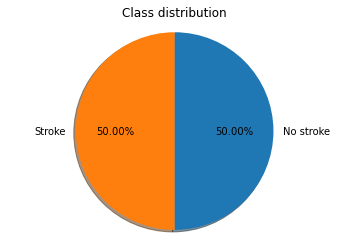

# samples associated with no stroke: 3364
# samples associated with stroke: 3364


In [ ]:
_, class_counts = np.unique(y_smote, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

In [ ]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_val.shape)
print("The size of testing output is", y_val.shape)

The size of training input is (5046, 10)
The size of training output is (5046,)
The size of testing input is (1682, 10)
The size of testing output is (1682,)


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

In [ ]:
X_train_std=pd.DataFrame(X_train_std,columns=X_smote.columns)
X_val_std=pd.DataFrame(X_val_std,columns=X_smote.columns)

In [ ]:
X_train_std.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.490022,-0.278151,-0.362478,-0.231181,0.535952,-2.135594,-0.818386,-0.583983,0.514145,0.344805
1,1.490022,-0.092883,-0.362478,-0.231181,0.535952,0.180625,-0.818386,2.269422,0.953559,0.344805
2,1.490022,0.985693,-0.362478,-0.231181,0.535952,0.180625,1.221918,0.328024,-0.177070,-1.114831
3,1.490022,-2.026547,-0.362478,-0.231181,-1.865838,0.180625,-0.818386,-0.792552,0.372279,0.344805
4,-0.671131,0.435933,-0.362478,-0.231181,0.535952,0.180625,1.221918,-0.718163,0.337395,0.344805


## Model Training

In [ ]:
clfs = [
    xgb.XGBClassifier(use_label_encoder =False,eval_metric='rmse'),
    lgb.LGBMClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    MLPClassifier(max_iter=500),
    GaussianNB(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier()
]
clf_names = [
    "XGBoost",
    "LightGBM",
    "DTC",
    "Logistic Regression",
    "NeuralNetwork",
    "NaiveBayes",
    "RFC",
    "Histogram Gradient"
]

In [ ]:
Roc_auc_wo = np.zeros(len(clfs))
Recall_wo = np.zeros(len(clfs))
Precision_wo = np.zeros(len(clfs))
F1_Score_wo = np.zeros(len(clfs))

In [ ]:
for i in np.arange(len(clfs)):
    print(clf_names[i])
    Roc_auc_wo[i] = np.mean(cross_validate(clfs[i], X_wot_smote, y_wot_smote, scoring="roc_auc", cv=5, return_train_score=False)["test_score"])
    Recall_wo[i] = np.mean(cross_validate(clfs[i], X_wot_smote, y_wot_smote, scoring="recall", cv=5, return_train_score=False)["test_score"])
    Precision_wo[i] = np.mean(cross_validate(clfs[i], X_wot_smote, y_wot_smote, scoring="precision", cv=5, return_train_score=False)["test_score"])
    F1_Score_wo[i] = np.mean(cross_validate(clfs[i], X_wot_smote, y_wot_smote, scoring="f1", cv=5, return_train_score=False)["test_score"])

XGBoost
LightGBM
DTC
Logistic Regression
NeuralNetwork
NaiveBayes
RFC
Histogram Gradient


## Without SMOTE and Standardization

In [ ]:
pd.DataFrame({"ROC_AUC":Roc_auc_wo*100,"Recall":Recall_wo*100,"Precision":Precision_wo*100,"F1_Score":F1_Score_wo*100}, index=clf_names)

,ROC_AUC,Recall,Precision,F1_Score
XGBoost,76.070029,7.806452,22.161616,11.469502
LightGBM,77.010837,3.913978,18.634921,6.417711
DTC,56.631559,18.236559,15.879949,17.132373
Logistic Regression,80.213861,0.666667,20.000000,1.290323
NeuralNetwork,74.912075,2.580645,0.000000,1.250000
NaiveBayes,79.211326,36.000000,16.844174,22.902918
RFC,77.062872,1.290323,33.333333,2.500000
Histogram Gradient,78.561369,6.559140,26.565657,10.259845


In [ ]:
Roc_auc = np.zeros(len(clfs))
Recall = np.zeros(len(clfs))
Precision = np.zeros(len(clfs))
F1_Score = np.zeros(len(clfs))

In [ ]:
for i in np.arange(len(clfs)):
    print(clf_names[i])
    Roc_auc[i] = np.mean(cross_validate(clfs[i], X_train_std, y_train, scoring="roc_auc", cv=5, return_train_score=False)["test_score"])
    Recall[i] = np.mean(cross_validate(clfs[i], X_train_std, y_train, scoring="recall", cv=5, return_train_score=False)["test_score"])
    Precision[i] = np.mean(cross_validate(clfs[i], X_train_std, y_train, scoring="precision", cv=5, return_train_score=False)["test_score"])
    F1_Score[i] = np.mean(cross_validate(clfs[i], X_train_std, y_train, scoring="f1", cv=5, return_train_score=False)["test_score"])

XGBoost
LightGBM
DTC
Logistic Regression
NeuralNetwork
NaiveBayes
RFC
Histogram Gradient


## With SMOTE and Standardization

In [ ]:
Acc_score_smote=[]
print("Accuracy with SMOTE and Standardization-----")
for mod in clfs:
    clf = mod
    clf.fit(X_train_std, y_train)
    y_preds=clf.predict(X_val_std)
    Acc_score_smote.append(metrics.accuracy_score(y_val, y_preds)*100)
    print("Accuracy using {}: {}".format(mod,metrics.accuracy_score(y_val, y_preds)*100))

Accuracy with SMOTE and Standardization-----
Accuracy using XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None): 94.53032104637337
Accuracy using LGBMClassifier(): 93.1629013079667
Accuracy using DecisionTreeClassifier(): 88.46611177170035
Accuracy using LogisticRegression(): 78.89417360285374
Accuracy using MLPClassifier(max_iter=500): 87.8715814506539

In [ ]:
pd.DataFrame({"ROC_AUC":Roc_auc*100,"Recall":Recall*100,"Precision":Precision*100,"F1_Score":F1_Score*100,'Accuracy':Acc_score_smote}, index=clf_names)

,ROC_AUC,Recall,Precision,F1_Score,Accuracy
XGBoost,98.535518,95.152419,92.765105,93.941026,94.530321
LightGBM,98.277711,94.794960,91.573143,93.150745,93.162901
DTC,87.420012,89.431427,85.838787,87.763570,88.466112
Logistic Regression,88.224677,80.650936,78.293264,79.451398,78.894174
NeuralNetwork,93.845870,90.662848,85.325318,87.771946,87.871581
NaiveBayes,86.219840,80.253558,76.143744,78.138650,77.348395
RFC,97.878377,93.960601,90.851712,91.783398,92.568371
Histogram Gradient,97.623645,94.239010,90.156680,92.152217,92.865636


## Hyperparameter Tuning of Models

#### Xgboost

In [ ]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_xgb = xgb.XGBClassifier()
param_dist = {'n_estimators': [i for i in range(100,1000,100)],
              'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'min_child_weight': [1, 2, 3, 4]
             }

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 30, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 2, 
                         n_jobs = -1)

In [ ]:
clf.fit(X_train_std,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[12:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monoto...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                      

In [ ]:
clf.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2}

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_after_hyperparameter=xgb.XGBClassifier(eval_metric='error',max_depth=6,min_child_weight=1,n_estimator=200
                                      ,learning_rate=0.3)

In [ ]:
xgb_after_hyperparameter.fit(X_train_std,y_train)

[12:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=200, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
metrics.roc_auc_score(y_val,xgb_after_hyperparameter.predict(X_val_std))*100

0.9452495245636235

#### LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_lightgbm={"eta"          : [0.1,0.15,0.2,0.25,0.3,0.45 ] ,
              "max_depth"    : [ 4, 5, 6,7],
              "n_estimators"  : [i for i in range(100,1000,100)]
}

In [ ]:
clf_lightgbm_gridcv = GridSearchCV(lgb.LGBMClassifier(), clf_lightgbm, cv=4, n_jobs=-1, verbose=2)

In [ ]:
clf_lightgbm_gridcv.fit(X_train_std,y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'eta': [0.1, 0.15, 0.2, 0.25, 0.3, 0.45],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900]},
             verbose=2)

In [ ]:
clf_lightgbm_gridcv.best_params_

{'eta': 0.1, 'max_depth': 7, 'n_estimators': 600}

In [ ]:
clf_lightgbm_gridcv.best_estimator_

LGBMClassifier(eta=0.1, max_depth=7, n_estimators=600)

In [ ]:
pipeline_model=lgb.LGBMClassifier(eta=0.1,max_depth=7,n_estimators=700)
pipeline_model.fit(X_train_std,y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


LGBMClassifier(eta=0.1, max_depth=7, n_estimators=700)

In [ ]:
metrics.accuracy_score(y_val,pipeline_model.predict(X_val_std))

0.9458977407847801

#### RandomForestClassifier

In [ ]:
clf_randomforest = {'n_estimators': [i for i in range(100,1000,100)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [9,10,11,12,13,14,15]}

In [ ]:
clf_randomforest_gridcv = GridSearchCV(RandomForestClassifier(), clf_randomforest, cv=4, n_jobs=-1, verbose=2)

In [ ]:
clf_randomforest_gridcv.fit(X_train_std,y_train)

Fitting 4 folds for each of 126 candidates, totalling 504 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900]},
             verbose=2)

In [ ]:
clf_randomforest_gridcv.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}

In [ ]:
clf_randomforest_gridcv.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=300)

In [ ]:
randomforest_after_hyperparameter=RandomForestClassifier(max_depth=15,max_features='sqrt',n_estimators=700)

In [ ]:
randomforest_after_hyperparameter.fit(X_train_std,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=700)

In [ ]:
metrics.accuracy_score(y_val,randomforest_after_hyperparameter.predict(X_val_std))

0.9268727705112961

#### Neural Network

In [ ]:
clf_nn = {
    'hidden_layer_sizes': [(10,15,20), (12,16,22), (16,20,22)],
    'max_iter': [50, 100, 200, 400, 800, 1600],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf_nn_gridsearchcv = GridSearchCV(MLPClassifier(), clf_nn, n_jobs= -1, cv=5,verbose=2,scoring='roc_auc')

In [ ]:
clf_nn_gridsearchcv.fit(X_train_std,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 15, 20), (12, 16, 22),
                                                (16, 20, 22)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 200, 400, 800, 1600],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc', verbose=2)

In [ ]:
clf_nn_gridsearchcv.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (16, 20, 22),
 'learning_rate': 'adaptive',
 'max_iter': 1600,
 'solver': 'adam'}

In [ ]:
nn_after_hyperparameter=MLPClassifier(hidden_layer_sizes=(16,20,22),max_iter=800,activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive')

In [ ]:
nn_after_hyperparameter.fit(X_train_std,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 20, 22),
              learning_rate='adaptive', max_iter=800)

In [ ]:
metrics.accuracy_score(y_val,nn_after_hyperparameter.predict(X_val_std))

0.8751486325802615

## Pipeline 

In [ ]:
missing_val=["N/A","NA","Na","N/a",np.nan,"XXX"]
df_pipeline=pd.read_csv('stroke.csv',sep=",",na_values=missing_val)

In [ ]:
df_pipeline

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.00,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.00,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df_pipeline.drop(columns=['id'],inplace=True)

In [ ]:
cnt=0
for i in df_pipeline.columns:
    print('{} {} has {} unique value and {}'.format(cnt,i,df_pipeline[i].nunique(),df_pipeline[i].dtype))
    cnt+=1

0 gender has 3 unique value and object
1 age has 104 unique value and float64
2 hypertension has 2 unique value and int64
3 heart_disease has 2 unique value and int64
4 ever_married has 2 unique value and object
5 work_type has 5 unique value and object
6 Residence_type has 2 unique value and object
7 avg_glucose_level has 3979 unique value and float64
8 bmi has 418 unique value and float64
9 smoking_status has 4 unique value and object
10 stroke has 2 unique value and int64


In [ ]:
df_pipeline.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_pipeline.shape

(5110, 11)

In [ ]:
trf1= ColumnTransformer([
    ('impute_bmi',SimpleImputer(strategy='mean'),[8])
],remainder='passthrough')

In [ ]:
trf2=ColumnTransformer([
    ('one_hot_encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,4,5,6,9])
],remainder='passthrough')

In [ ]:
trf3= ColumnTransformer([
    ('scale',StandardScaler(),[0,1,2,3,4,5,6,7,8,9])
])

In [ ]:
trf4= ColumnTransformer([
    ('scale',StandardScaler(),[1,7,8])
],remainder='passthrough')

In [ ]:
from imblearn.over_sampling import SMOTE
trf4=SMOTE()

In [ ]:
p1_trf5=xgb.XGBClassifier(eval_metric='error',max_depth=6,min_child_weight=1,n_estimator=200,learning_rate=0.3)

In [ ]:
p2_trf5=lgb.LGBMClassifier(eta=0.1,max_depth=7,n_estimators=700)

In [ ]:
p3_trf5=RandomForestClassifier(max_depth=15,max_features='sqrt',n_estimators=700)

In [ ]:
p4_trf5=MLPClassifier(hidden_layer_sizes=(16,20,22),max_iter=800,activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive')

In [ ]:
pipe1=make_pipeline(trf1,trf2,trf3,trf4,p1_trf5)

In [ ]:
pipe2=make_pipeline(trf1,trf2,trf3,trf4,p2_trf5)

In [ ]:
pipe3=make_pipeline(trf1,trf2,trf3,trf4,p3_trf5)

In [ ]:
pipe4=make_pipeline(trf1,trf2,trf3,trf4,p4_trf5)

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[pipe1,pipe2,pipe3,pipe4],voting='hard',verbose=True)
X_pipeline=df_pipeline.drop(columns=['stroke'])
y_pipeline=df_pipeline[['stroke']]

In [ ]:
X_pipeline['gender']=X_pipeline['gender'].replace('Other','Male')

In [ ]:
eclf.fit(X_pipeline,y_pipeline)

Fitting 4 classifiers...
Fitting clf1: pipeline (1/4)
[14:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting clf2: pipeline (2/4)
Fitting clf3: pipeline (3/4)
Fitting clf4: pipeline (4/4)


EnsembleVoteClassifier(clfs=[Pipeline(steps=[('columntransformer-1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_bmi',
                                                                               SimpleImputer(),
                                                                               [8])])),
                                             ('columntransformer-2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [0,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                9])])),
                                             ('columntransformer-3'...
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [0,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                9])])),
                                             ('columntransformer-3',
                                              ColumnTransformer(transformers=[('scale',
                                                                               StandardScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9])])),
                                             ('smote', SMOTE()),
                                             ('mlpclassifier',
                                              MLPClassifier(activation='tanh',
                                                            hidden_layer_sizes=(16,
                                                                                20,
                                                                                22),
                                                            learning_rate='adaptive',
                                                            max_iter=800))])],
                       verbose=True)

In [ ]:
import pickle

In [ ]:
file = open('stroke_rf.pkl','wb')

pickle.dump(pipeline_model, file)

In [ ]:
model = open('stroke_rf.pkl','rb')
forest = pickle.load(model)